### How to plot a pdf of a RV from scipy stats?

See also [all_scipy_dists.ipynb](./all_scipy_dists.ipynb) where code was inspired from.

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
from scipy.stats import uniform, norm


# notebooks figs setup
%matplotlib inline
import matplotlib, matplotlib.pyplot as plt

# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')

[Text(0.5, 0, 'x'), Text(0, 0.5, 'Frequency')]

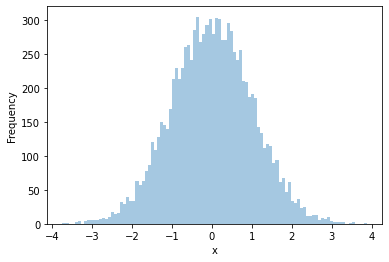

In [2]:
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)


# Plot the distribution of normal random variables using Seaborn’s distplot.
ax = sns.distplot(data_normal, bins=100, kde=False)
ax.set(xlabel='x', ylabel='Frequency')

<AxesSubplot:title={'center':'Normal distributino $\\mathcal{N}(1000,100)$'}, xlabel='ELV'>

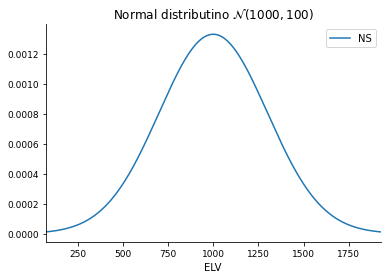

In [4]:
import scipy as sp

def plot_rv(rv, label=None, xlabel=None, ax=None, title=None):
    """
    Plot a SciPy distribution (a `rv_frozen` object).
    """
    assert isinstance(rv, sp.stats._distn_infrastructure.rv_frozen), \
        'this function assumes plotting a rv_forzen random variable'
    size = 10000
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), size)
    y = rv.pdf(x)

    if ax is None:
        fig, ax = plt.subplots()
    sns.lineplot(x, y, ax=ax, label=label)
    
    ax.set_title(title)
    ax.set_xlim(x.min(), x.max())
    ax.set_xlabel(xlabel)
    ax.tick_params(axis='both', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
    return ax # in case want to plot more...

rvNS = norm(loc=1000, scale=300)

plot_rv(rvNS,
        xlabel="ELV",
        label="NS",
        title='Normal distributino $\mathcal{N}(1000,100)$')


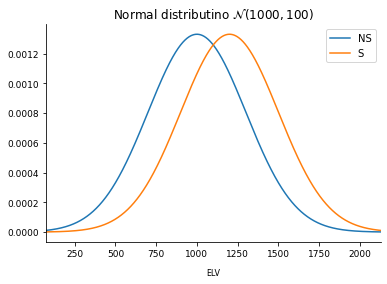

In [5]:
size = 10000

Delta = 200
rvNS = norm(loc=1000, scale=300)
rvS = norm(loc=1000+Delta, scale=300)

x = np.linspace(rvNS.ppf(0.001), rvS.ppf(0.999), size)
yNS = rvNS.pdf(x)
yS = rvS.pdf(x)

fig, ax = plt.subplots()
sns.lineplot(x, yNS, ax=ax, label="NS") #  color='black', alpha=0.5)
sns.lineplot(x, yS, ax=ax, label="S")
ax.set_title('Normal distributino $\mathcal{N}(1000,100)$')
# ax.set_title(ax.get_title(), pad=25)
ax.set_xlim(x.min(), x.max())
ax.set_xlabel('ELV', fontsize=8, labelpad=10)
ax.tick_params(axis='both', labelsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
